# Backtesting

In [96]:
#import statements
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
sns.set_theme(color_codes=True)
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import yfinance as yf
from alpha_vantage.techindicators import TechIndicators
from alpha_vantage.timeseries import TimeSeries
import talib
sns.set_theme(color_codes=True)
API_KEY = 'EC1W3AWVDZ3LA1T8'
ts= TimeSeries(key=API_KEY,output_format='pandas' )
ti = TechIndicators(key=API_KEY,output_format='pandas')
sns.set(rc={'figure.figsize':(30,9)})

In [97]:
#get data from yahoo finance
ticker = 'AAPL'
start = '2020-01-01'
end = '2020-04-30'
def get_data(interval:str):
    data, meta_data = ts.get_intraday(symbol=ticker,interval=interval, outputsize='full',)
    data['open'] = data['1. open']
    data['high'] = data['2. high']
    data['low'] = data['3. low']
    data['close'] = data['4. close']
    data['volume'] = data['5. volume']
    data.drop(['1. open','2. high','3. low','4. close','5. volume'],axis=1,inplace=True)
    data.sort_index(inplace=True)
    return data
df_5= get_data('5min')
df_15 = get_data('15min')


In [98]:
LAG =500
def getEMA_SMA_BANDS(df, period):
    df['EMA_'+str(period)] = df['close'].ewm(span=period,min_periods=period).mean()
    df['SMA_'+str(period)] = df['close'].rolling(window=period).mean()
    df['Rolling Std'] = df['close'].rolling(window=period).std()
    df['Upper Band'] = df['EMA_'+str(period)] + (df['Rolling Std']*1.4)
    df['Lower Band'] = df['EMA_'+str(period)] - (df['Rolling Std']*1.4)
    # df = df[period:]
    return df
getEMA_SMA_BANDS(df_5, LAG)
getEMA_SMA_BANDS(df_15, LAG)
print(df_15['close'].describe())
df_15

count    1917.000000
mean      168.658992
std         5.909593
min       154.150000
25%       164.581900
50%       168.700000
75%       173.426900
max       179.410200
Name: close, dtype: float64


,open,high,low,close,volume,EMA_500,SMA_500,Rolling Std,Upper Band,Lower Band
date,,,,,,,,,,
2022-03-18 04:15:00,159.8900,159.90,159.67,159.90,8050.0,NaN,NaN,NaN,NaN,NaN
2022-03-18 04:30:00,160.0000,160.05,159.87,160.05,6694.0,NaN,NaN,NaN,NaN,NaN
2022-03-18 04:45:00,160.0700,160.07,159.60,159.60,10199.0,NaN,NaN,NaN,NaN,NaN
2022-03-18 05:00:00,159.7800,159.78,159.55,159.61,3385.0,NaN,NaN,NaN,NaN,NaN
2022-03-18 05:15:00,159.6000,159.64,159.57,159.64,1360.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-04-29 19:00:00,157.8500,157.93,157.85,157.90,13719.0,161.906692,162.358148,4.015574,167.528495,156.284888
2022-04-29 19:15:00,157.8701,157.93,157.86,157.90,10466.0,161.890690,162.338348,4.013094,167.509021,156.272358
2022-04-29 19:30:00,157.9000,157.99,157.90,157.99,17632.0,161.875111,162.318728,4.010318,167.489556,156.260665


,close,upper,lower,EMA_500,SMA_500
date,,,,,
2022-04-01 04:05:00,175.45,NaN,NaN,NaN,NaN
2022-04-01 04:10:00,175.37,NaN,NaN,NaN,NaN
2022-04-01 04:15:00,175.30,NaN,NaN,NaN,NaN
2022-04-01 04:20:00,175.19,NaN,NaN,NaN,NaN
2022-04-01 04:25:00,175.42,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2022-04-29 19:40:00,158.09,162.859570,157.157995,160.008782,159.953469
2022-04-29 19:45:00,158.05,162.850025,157.151901,160.000963,159.954612
2022-04-29 19:50:00,157.95,162.839222,157.146329,159.992775,159.956192


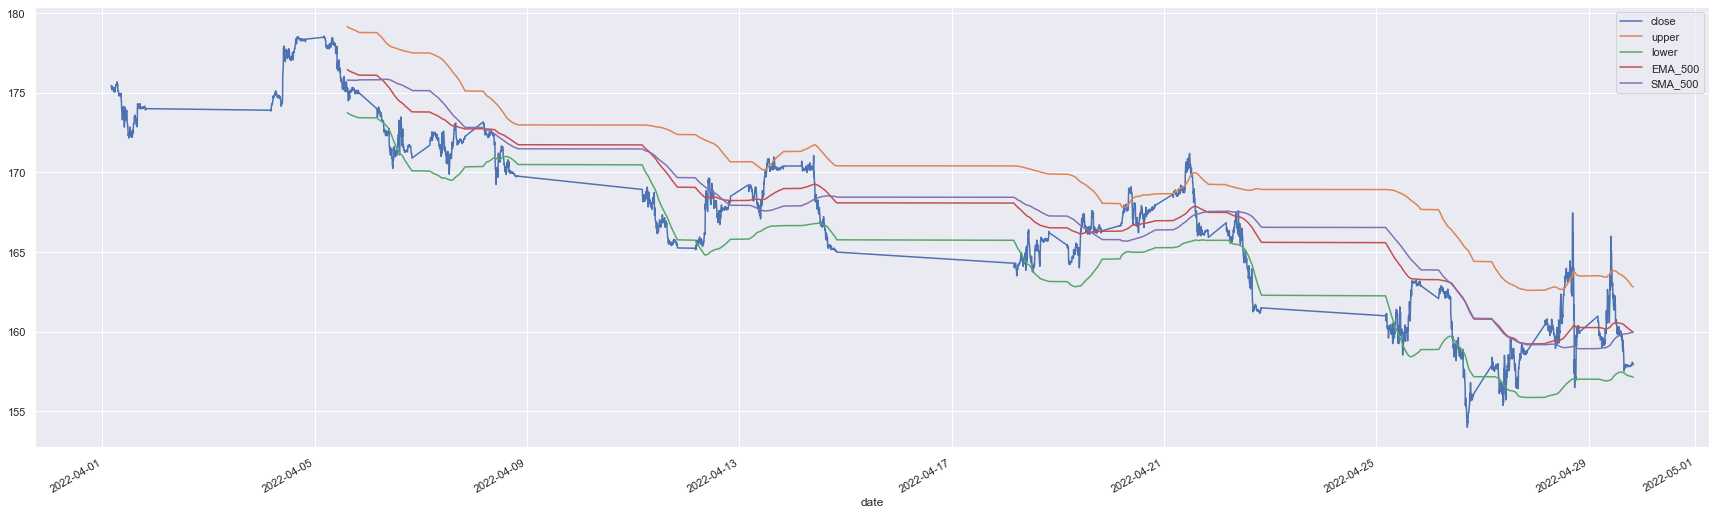

In [112]:
plot_df = pd.DataFrame(index=df_5.index)
plot_df['close'] = df_5['close']
plot_df['upper'] = df_5['Upper Band']
plot_df['lower'] = df_5['Lower Band']
plot_df['EMA_500'] = df_5['EMA_500']
plot_df['SMA_500'] = df_5['SMA_500']
plot_df.plot(figsize=(30,9),)
# sns.lineplot(data=plot_df,)
# px.line(plot_df, )



In [120]:
#iterate through the dataframe and buy if if the prive is below the lower band
#sell if the price is above the upper band

is_already_bought = False
plot_df['signal'] = 0

for date, row in plot_df.T.iteritems():
    if row['close'] < row['lower']:
        if is_already_bought == False:
            is_already_bought = True
            print('bought on {}'.format(date))
            row['signal'] = 1
        else:
            print('already bought on {}'.format(date))
    elif row['close'] > row['upper']:
        if is_already_bought == True:
            is_already_bought = False
            print('sold on {}'.format(date))
            row['signal'] = -1
        else:
            print('already sold on {}'.format(date))
            # plot_df['signal'][date] = 0
        print('Sell')
    else:
        print('Hold')
        # plot_df['signal'][date] = 0
plot_df

Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold


,close,upper,lower,EMA_500,SMA_500,signal
date,,,,,,
2022-04-01 04:05:00,175.45,NaN,NaN,NaN,NaN,0
2022-04-01 04:10:00,175.37,NaN,NaN,NaN,NaN,0
2022-04-01 04:15:00,175.30,NaN,NaN,NaN,NaN,0
2022-04-01 04:20:00,175.19,NaN,NaN,NaN,NaN,0
2022-04-01 04:25:00,175.42,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...
2022-04-29 19:40:00,158.09,162.859570,157.157995,160.008782,159.953469,0
2022-04-29 19:45:00,158.05,162.850025,157.151901,160.000963,159.954612,0
2022-04-29 19:50:00,157.95,162.839222,157.146329,159.992775,159.956192,0


In [121]:
plot_df['signal'].describe()

count    3764.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: signal, dtype: float64